<a href="https://colab.research.google.com/github/Karthikt04/NM/blob/main/NLP_SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[[398  36 387]
 [189  17 182]
 [374  42 375]]
              precision    recall  f1-score   support

    negative       0.41      0.48      0.45       821
     neutral       0.18      0.04      0.07       388
    positive       0.40      0.47      0.43       791

    accuracy                           0.40      2000
   macro avg       0.33      0.33      0.32      2000
weighted avg       0.36      0.40      0.37      2000



<ipython-input-32-5d7de21ab06b>:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette='pastel') # Changed 'Sentiment' to 'sentiment'


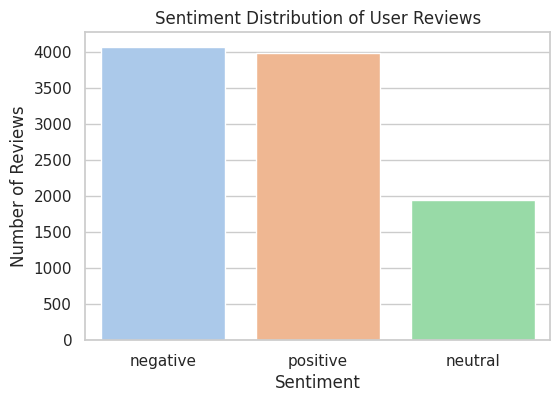

In [32]:
# 1. Imports
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# 2. Load Data
df = pd.read_csv('/content/sample_data/chatgpt_reviews - chatgpt_reviews.csv')  # Adjust if needed

# 3. Clean text
def clean_text(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    return " ".join([word for word in text.split() if word not in stop_words])

df['clean_text'] = df['review'].apply(clean_text)

# 4. Label sentiment
def map_sentiment(rating):
    if rating <= 2:
        return "negative"
    elif rating == 3:
        return "neutral"
    else:
        return "positive"

df['sentiment'] = df['rating'].apply(map_sentiment)

# 5. TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['clean_text'])

# 6. Encode labels
y = df['sentiment'].map({'negative': 0, 'neutral': 1, 'positive': 2})

# 7. Split & Train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 8. Evaluate
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=['negative', 'neutral', 'positive']))

#Sentiment Distribution of User Reviews
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style='whitegrid')

# Plot sentiment distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='sentiment', palette='pastel') # Changed 'Sentiment' to 'sentiment'
plt.title('Sentiment Distribution of User Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()

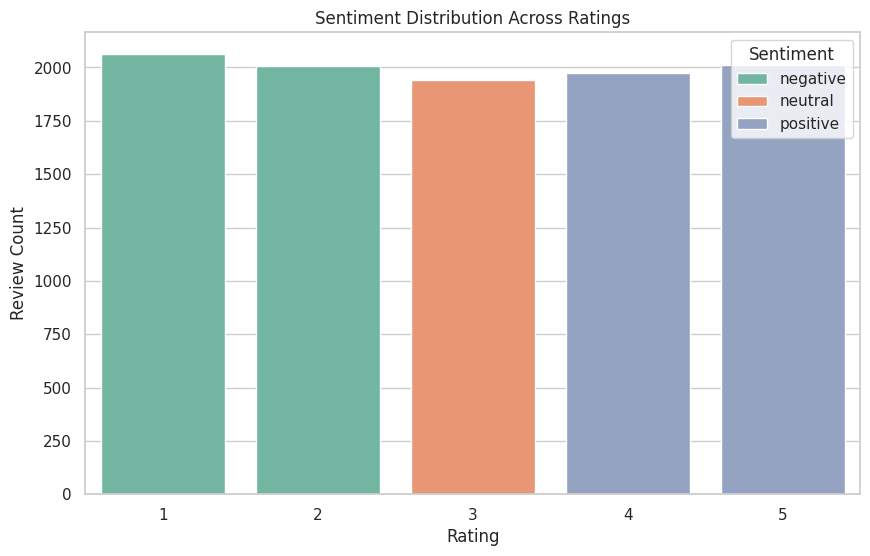

In [33]:
#Sentiment by Rating (Mismatch Detection)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='rating', hue='sentiment', palette='Set2')
plt.title('Sentiment Distribution Across Ratings')
plt.xlabel('Rating')
plt.ylabel('Review Count')
plt.legend(title='Sentiment')
plt.show()


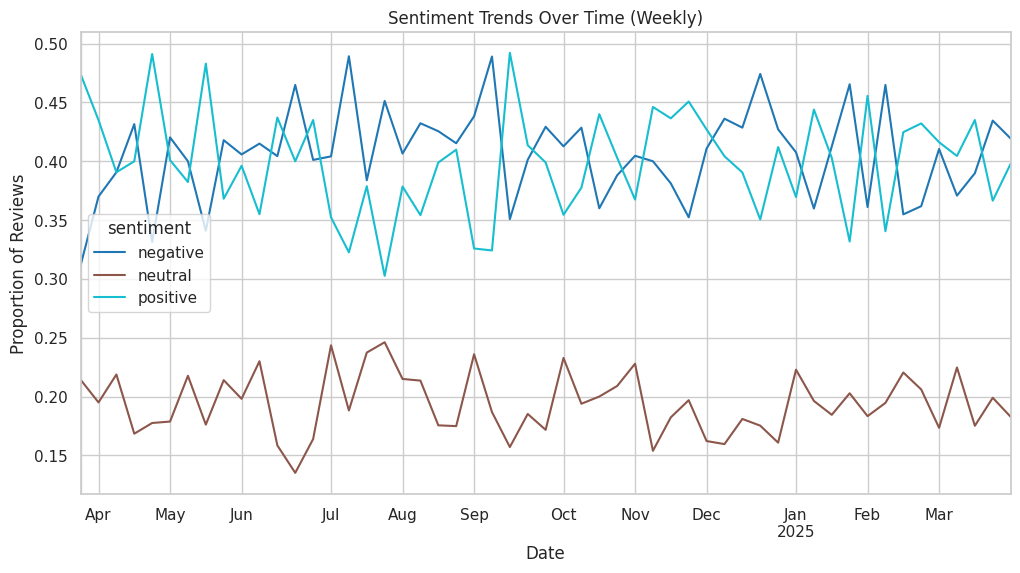

In [34]:
# 4. Sentiment trend over time (monthly)
df['date'] = pd.to_datetime(df['date'])

# Group by week and calculate sentiment proportions
sentiment_time = df.groupby([pd.Grouper(key='date', freq='W'), 'sentiment']) \
                   .size().unstack().fillna(0)

# Normalize counts to proportions
sentiment_time_prop = sentiment_time.div(sentiment_time.sum(axis=1), axis=0)

# Plot
sentiment_time_prop.plot(kind='line', figsize=(12, 6), colormap='tab10')
plt.title('Sentiment Trends Over Time (Weekly)')
plt.ylabel('Proportion of Reviews')
plt.xlabel('Date')
plt.grid(True)
plt.show()


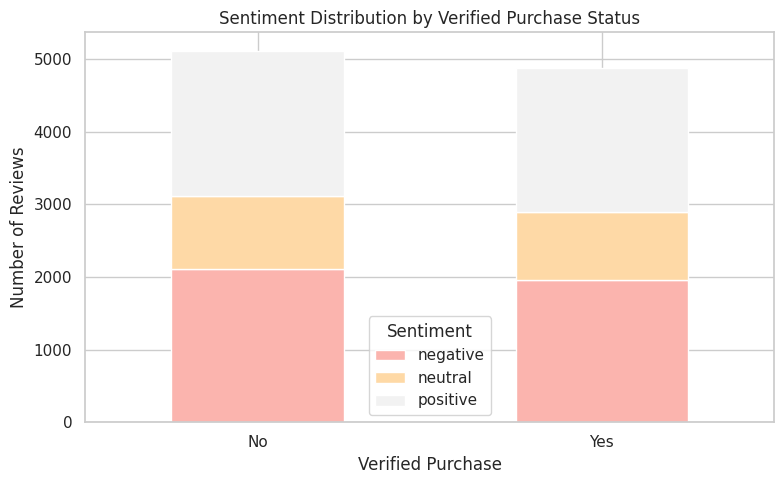

In [35]:
# Group by verified status and sentiment
verified_sentiment = df.groupby(['verified_purchase', 'sentiment']).size().unstack(fill_value=0)

# Plot
verified_sentiment.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='Pastel1')
plt.title('Sentiment Distribution by Verified Purchase Status')
plt.xlabel('Verified Purchase')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()



<ipython-input-36-f8b4922926c4>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sentiment', y='review_length', data=df, palette='Set2')


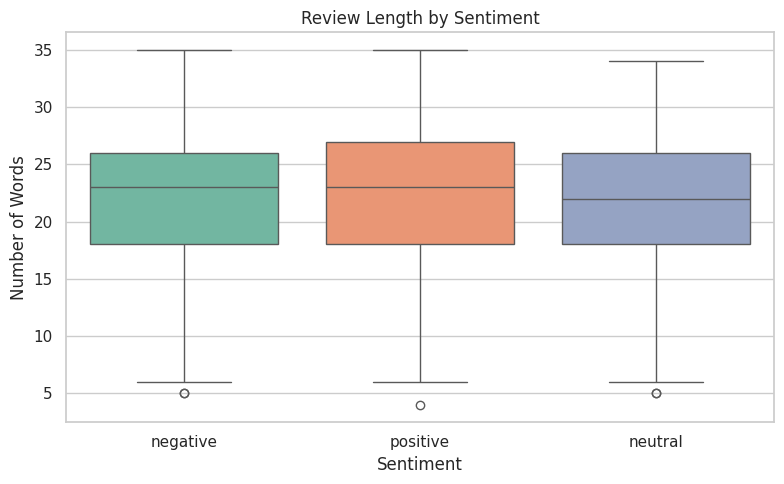

In [36]:
# Add review length column
df['review_length'] = df['review'].apply(lambda x: len(x.split()))

# Box plot of review lengths by sentiment
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.boxplot(x='sentiment', y='review_length', data=df, palette='Set2')
plt.title('Review Length by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Number of Words')
plt.tight_layout()
plt.show()


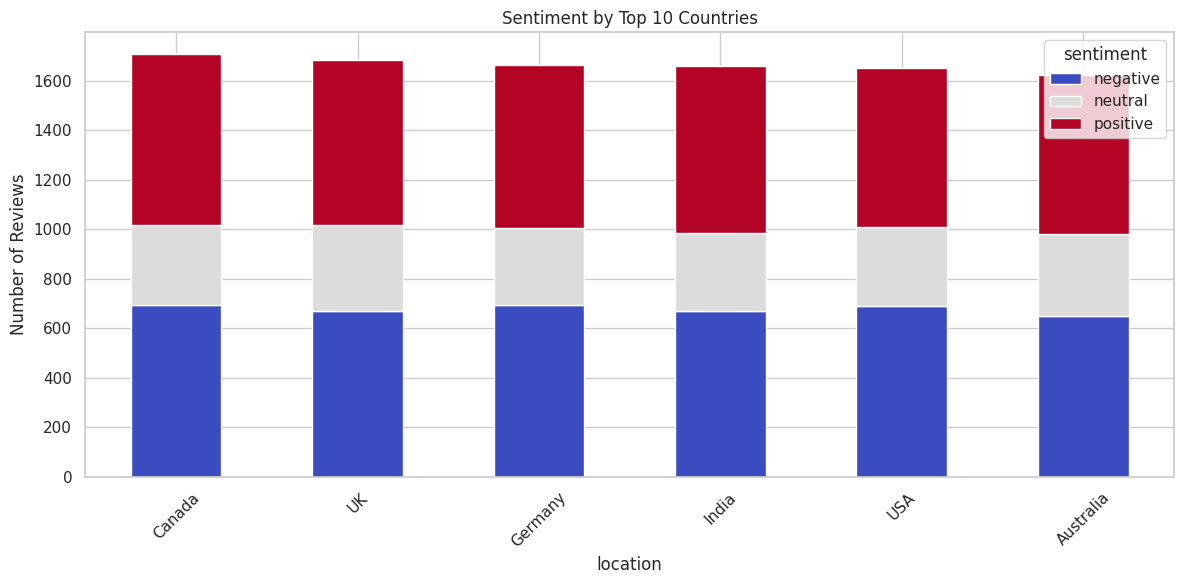

In [37]:
# Group by country and sentiment
location_sentiment = df.groupby(['location', 'sentiment']).size().unstack(fill_value=0)

# Sort and plot top 10 countries by total reviews
top_locations = location_sentiment.sum(axis=1).sort_values(ascending=False).head(10)
location_sentiment.loc[top_locations.index].plot(kind='bar', figsize=(12, 6), stacked=True, colormap='coolwarm')
plt.title('Sentiment by Top 10 Countries')
plt.xlabel('location')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


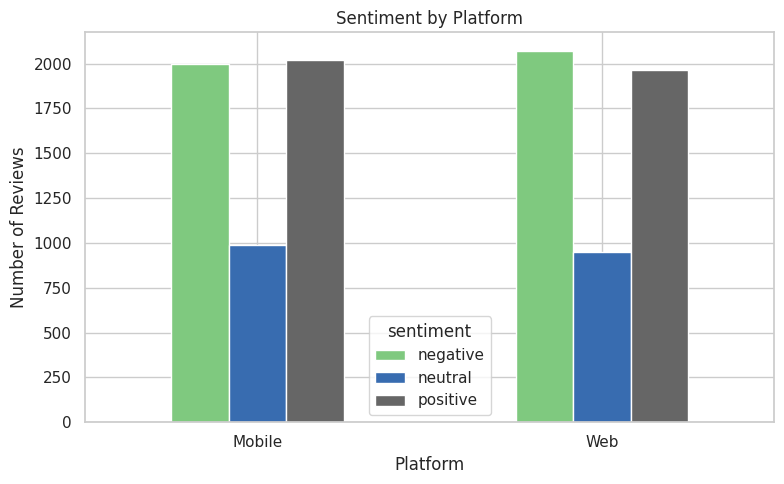

In [38]:
# Assuming 'platform' column exists with values like 'Web', 'Mobile'
platform_sentiment = df.groupby(['platform', 'sentiment']).size().unstack(fill_value=0)

# Plot
platform_sentiment.plot(kind='bar', figsize=(8, 5), colormap='Accent')
plt.title('Sentiment by Platform')
plt.xlabel('Platform')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


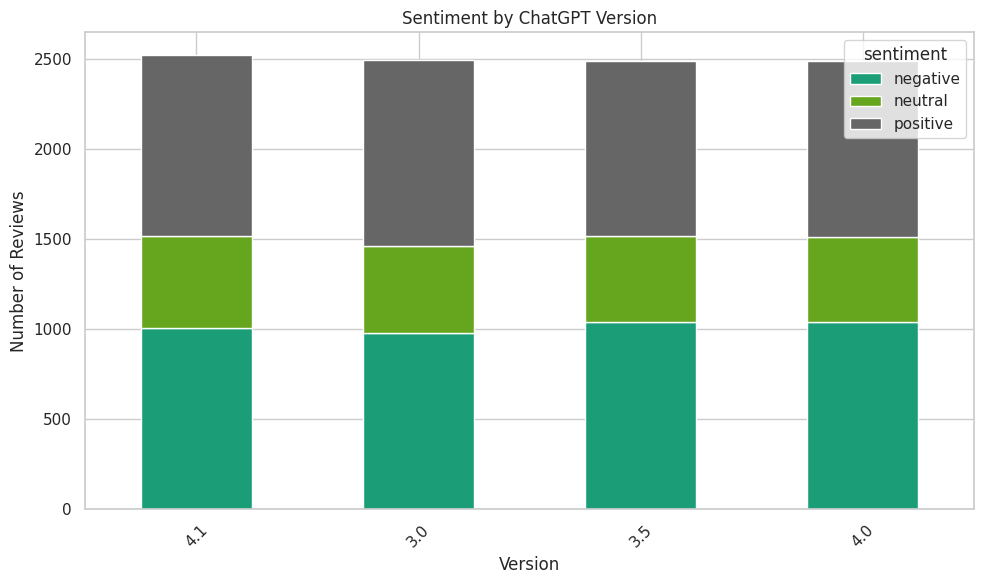

In [39]:
# Group by version and sentiment
version_sentiment = df.groupby(['version', 'sentiment']).size().unstack(fill_value=0)

# Plot top 10 most-reviewed versions
top_versions = version_sentiment.sum(axis=1).sort_values(ascending=False).head(10)
version_sentiment.loc[top_versions.index].plot(kind='bar', figsize=(10, 6), stacked=True, colormap='Dark2')
plt.title('Sentiment by ChatGPT Version')
plt.xlabel('Version')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-40-10eb1293d731>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette='Reds_r')


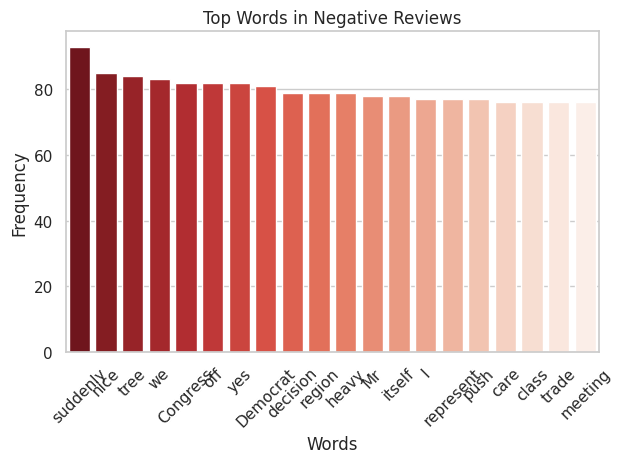

In [40]:
from collections import Counter

# Combine all negative reviews into one string
# Changed 'Negative' to 'negative' in the filter condition
negative_words = ' '.join(df[df['sentiment'] == 'negative']['review']).split()

# Count and plot top 20 most frequent words
neg_freq = Counter(negative_words).most_common(20)
words, counts = zip(*neg_freq)
plt.figure()
sns.barplot(x=list(words), y=list(counts), palette='Reds_r')
plt.title('Top Words in Negative Reviews')
plt.xticks(rotation=45)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

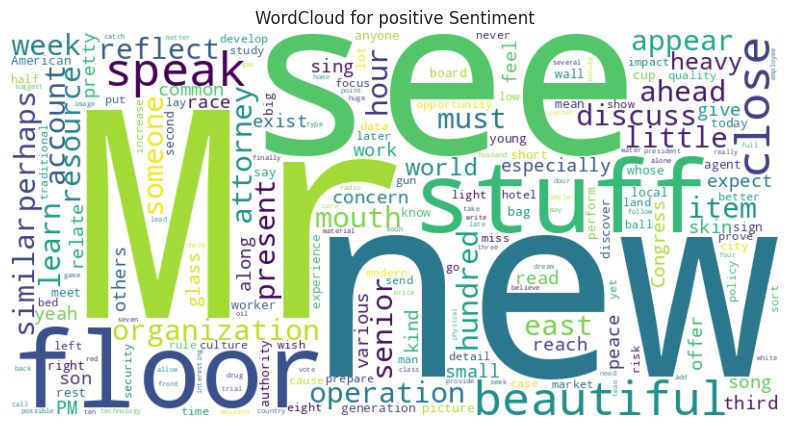

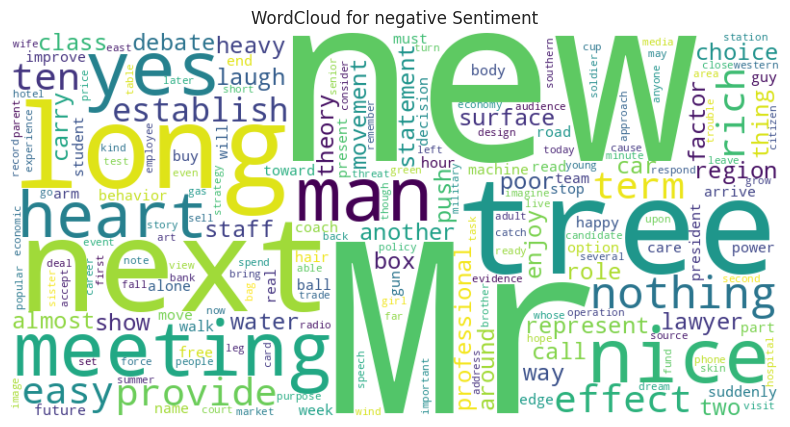

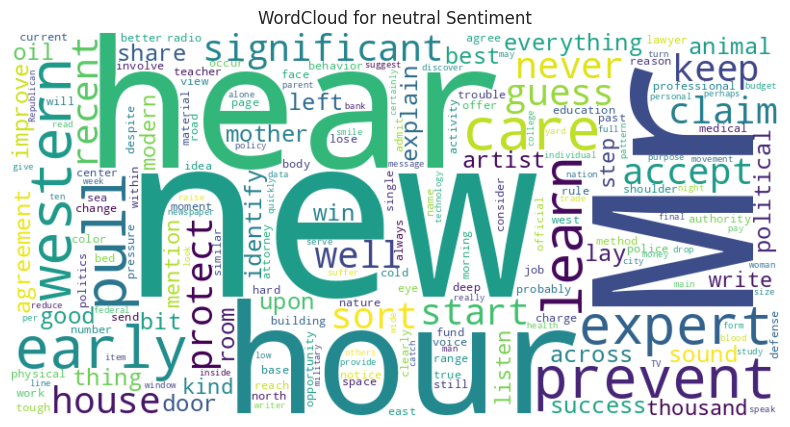

In [41]:
from wordcloud import WordCloud

def show_wordcloud_for_sentiment(sentiment_label, color='white'):
    text = ' '.join(df[df['sentiment'] == sentiment_label]['review'])
    wordcloud = WordCloud(width=800, height=400, background_color=color).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'WordCloud for {sentiment_label} Sentiment')
    plt.show()

# WordClouds
show_wordcloud_for_sentiment('positive')
show_wordcloud_for_sentiment('negative')
show_wordcloud_for_sentiment('neutral')
